### Dataset

Dataset yang saya ambil dari kaggle berikut linknya : https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data

Deskripsi : Pada dataset Prediksi Status Pinjaman ini kami memiliki data pemohon yang sebelumnya mengajukan pinjaman berdasarkan properti yang merupakan Pinjaman Properti.
Bank akan memutuskan apakah akan memberikan pinjaman kepada pemohon berdasarkan beberapa faktor seperti Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, dan lain-lain

Studi Kasus : 
Dalam proyek ini, kami akan mengklasifikasikan seseorang apakah dia bisa mendapatkan jumlah pinjaman berdasarkan Pendapatan, Pendidikan, Pengalaman Kerja, Pinjaman yang diambil sebelumnya, dan banyak faktor lainnya.

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

#### Loading Dataset

In [2]:
df = pd.read_csv("Dataset/loan_data.csv")
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(381, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583        

In [6]:
df.isnull().sum()/df.shape[0]*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Loan_Amount_Term"].value_counts(normalize = True)

Loan_Amount_Term
360.0    0.843243
180.0    0.078378
480.0    0.029730
300.0    0.018919
120.0    0.008108
84.0     0.008108
240.0    0.005405
60.0     0.002703
12.0     0.002703
36.0     0.002703
Name: proportion, dtype: float64

In [9]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0      1
63.0      1
101.0     1
48.0      1
40.0      1
Name: count, Length: 101, dtype: int64

Dari hasil diatas, kita perlu : 

1- Isi nilai null dengan nilai mode di beberapa kolom (Gender, Dependents, Self_Employed, Loan_Amount_Term, Credit_History)

2- Kita perlu mengubah representasi beberapa fitur kategorikal menjadi nilai biner (Jenis Kelamin, Menikah, Pendidikan, Wiraswasta, Patung Pinjaman)

3- Pada kolom Loan_Amount_Term perhatikan bahwa 84% sebagian besar nilainya 360 jadi saya akan mengubah representasi kolom ini menjadi jika nilainya >= 360 jadi 1 dan jika kurang menjadi 0

4- Saya juga memperhatikan bahwa kolom Jumlah pinjaman seharusnya mewakili uang dalam jumlah besar tetapi saya menemukan misalnya jika sebuah sel berisi 3000 maka hanya berisi 3 jadi saya akan mengalikan semua nilai di kolom ini dengan 1000

5- Saya juga akan mengganti nama kolom Pendidikan menjadi Lulus dan kolom Jumlah_Pinjaman menjadi Jangka Panjang

6- Saya akan menghapus kolom Loan_ID

#### Cleaning

In [10]:
df["LoanAmount"] = df["LoanAmount"]*1000
df["LoanAmount"]

0      128000.0
1       66000.0
2      120000.0
3      141000.0
4       95000.0
         ...   
376    128000.0
377    108000.0
378     71000.0
379     40000.0
380    133000.0
Name: LoanAmount, Length: 381, dtype: float64

In [11]:
df["Gender"] = np.where((df["Gender"]=="Male"), 1, np.where((df["Gender"]=="Female"), 0, np.nan))
df["Married"] = np.where((df["Married"]=="Yes"),1,0)
df["Education"] = np.where((df["Education"]=="Graduate"),1,0)
df["Self_Employed"] = np.where((df["Self_Employed"]=="Yes"),1 ,np.where((df["Self_Employed"]=="No"),0,np.nan))
df["Loan_Status"] = np.where((df["Loan_Status"]=="Y"),1,0)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1,1,0.0,4583,1508.0,128000.0,360.0,1.0,Rural,0
1,LP001005,1.0,1,0,1,1.0,3000,0.0,66000.0,360.0,1.0,Urban,1
2,LP001006,1.0,1,0,0,0.0,2583,2358.0,120000.0,360.0,1.0,Urban,1
3,LP001008,1.0,0,0,1,0.0,6000,0.0,141000.0,360.0,1.0,Urban,1
4,LP001013,1.0,1,0,0,0.0,2333,1516.0,95000.0,360.0,1.0,Urban,1


In [13]:
df["Loan_Amount_Term"] = np.where((df["Loan_Amount_Term"]>=360),1,np.where((df["Loan_Amount_Term"]<360),0,np.nan))

In [14]:
df.rename(columns = {"Loan_Amount_Term" : "Long_term" , "Education" : "Graduated"} , inplace = True)

In [15]:
df.drop(["Loan_ID"] , axis = 1 , inplace = True)

In [16]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [17]:
x=0
for i in (df.isnull().any().values):
  if i:
    df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
  x+=1

/tmp/ipykernel_311440/12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
/tmp/ipykernel_311440/12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [18]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Graduated            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Long_term            False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [20]:
quantile = df[["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]].quantile([0.25,0.5,0.75])
for i in ["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]:
    q1 = quantile[i][0.25]-(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    q2 = quantile[i][0.75]+(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    index = (df[(df[i]<q1) | (df[i]>q2)]).index
    df.drop(index , axis = 0 , inplace = True)

#### Analysis Process

In [21]:
def prop_subplot(cols):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 5))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        g1 = df.groupby([col])["Loan_Status"].value_counts(normalize=True).reset_index(name="prop")
        g1 = g1[g1["Loan_Status"] == 1]
        g = sns.barplot(x=col, y="prop", data=g1, order=g1.sort_values("prop", ascending=False)[col], color='steelblue', ax=axes[i])
        g.set_xlabel(col)
        g.set_ylabel("Success In Repay The Loan")
        g.set_title(f"Success Rate by {col}")

    plt.tight_layout()
    plt.show()

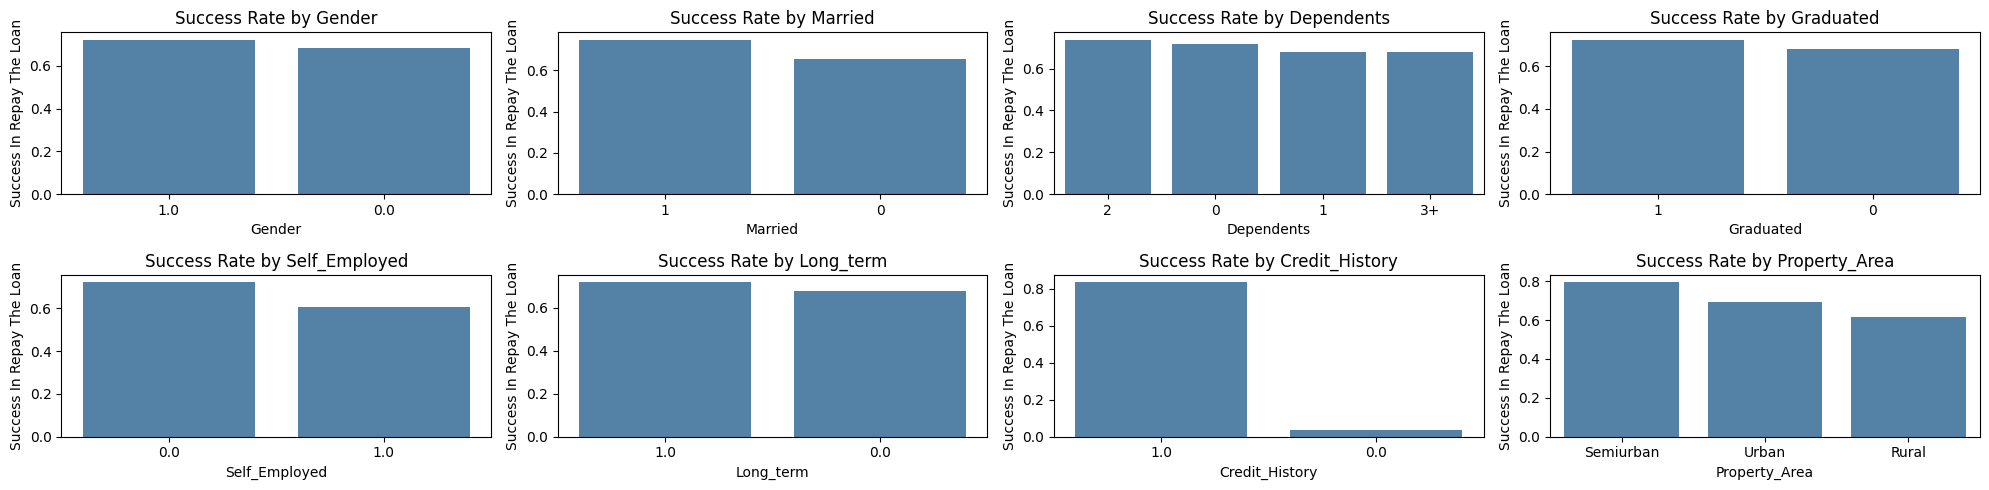

In [22]:
# Memanggil fungsi prop_subplot dengan daftar variabel yang diinginkan
prop_subplot(["Gender", "Married", "Dependents", "Graduated", "Self_Employed", "Long_term", "Credit_History", "Property_Area"])

Dari sel sebelumnya kita dapat menyimpulkan bahwa:
1- Laki-laki membayar pinjamannya lebih banyak daripada perempuan (Male > Female)
2- Orang yang sudah menikah membayar kembali pinjamannya lebih banyak daripada orang yang belum menikah (Married ?)
3- Orang-orang yang lulus membayar kembali pinjaman mereka lebih banyak daripada mereka yang tidak (Graduated > Undergraduate)
4- Para wiraswasta membayar kembali pinjaman mereka lebih sedikit dibandingkan mereka yang tidak
5- Pinjaman jangka panjang lebih mungkin dibayar daripada pinjaman jangka pendek
6- Orang dengan Riwayat_Kredit yang kuat lebih cenderung membayar pinjaman lebih banyak dibandingkan orang dengan Riwayat_Kredit yang lemah (Faktor Kuat)
7- Masyarakat semi-perdesaan lebih mungkin untuk membayar kembali masyarakat perkotaan dan masyarakat pedesaan menjadi yang terakhir
8- orang dengan 2 Tanggungan lebih mungkin menjadi daripada 0 Tanggungan daripada 1 Tanggungan daripada +3 Tanggungan

Saya rasa secara menyeluruh Credit_History , Self employed , Property_Area adalah faktor terpengaruh dalam jumlah peminjaman

In [23]:
def num(col2):
  fig,axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (6,4))
  sns.kdeplot(x = df[col2] , hue = df["Loan_Status"] , ax = axs[0])
  sns.violinplot(x = df["Loan_Status"]  ,y = df[col2] , ax = axs[1] , inner = "quartile")
  plt.tight_layout()
  plt.show()

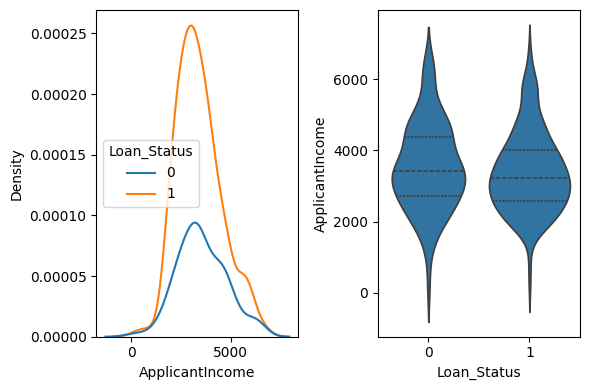

In [24]:
num("ApplicantIncome")

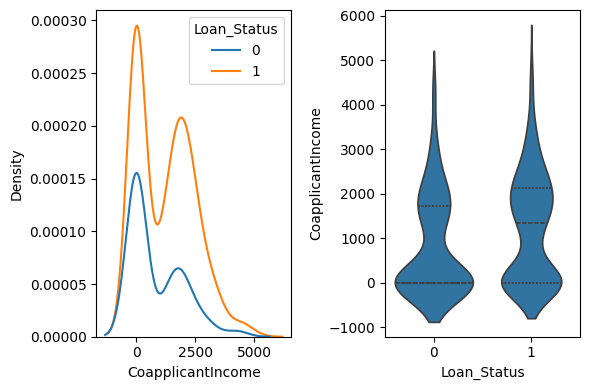

In [25]:
num("CoapplicantIncome")

In [26]:
q = df.groupby(["Loan_Status"])["CoapplicantIncome"].quantile([.25, .5, .75]).reset_index(name= "quantile")

/tmp/ipykernel_311440/3742304833.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  sns.barplot(x = q["Loan_Status"] , y = q["quantile"] , hue = q["level_1"] , color='steelblue')


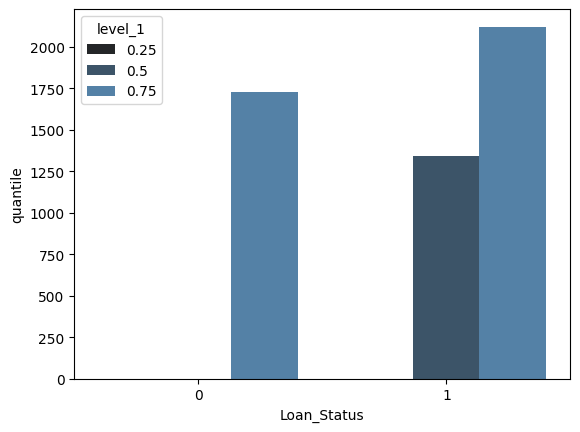

In [27]:
sns.barplot(x = q["Loan_Status"] , y = q["quantile"] , hue = q["level_1"] , color='steelblue')
plt.show()

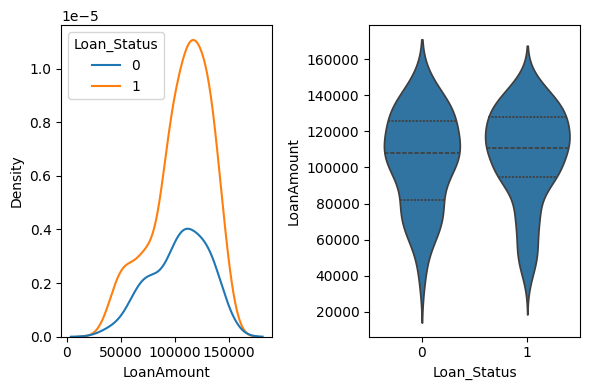

In [28]:
num("LoanAmount")

Saya rasa tidak ada faktor penting dari fitur sebelumnya yang mempengaruhi jumlah pinjaman kecuali CoapplicantIncome

In [29]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


Mari periksa di sel berikutnya koefisien koreksi antara fitur dan target

In [30]:
x = abs(df.drop(columns=["Dependents","Property_Area"]).corr()["Loan_Status"][0:-1]).sort_values()

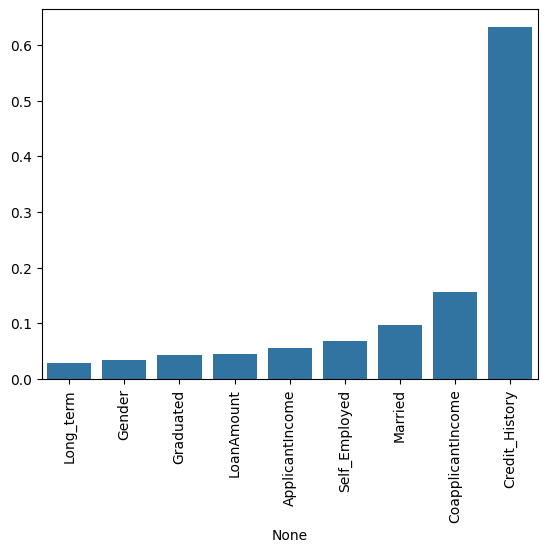

In [31]:
sns.barplot(x = x.index , y = x.values)
plt.xticks(rotation = 90)
plt.show()

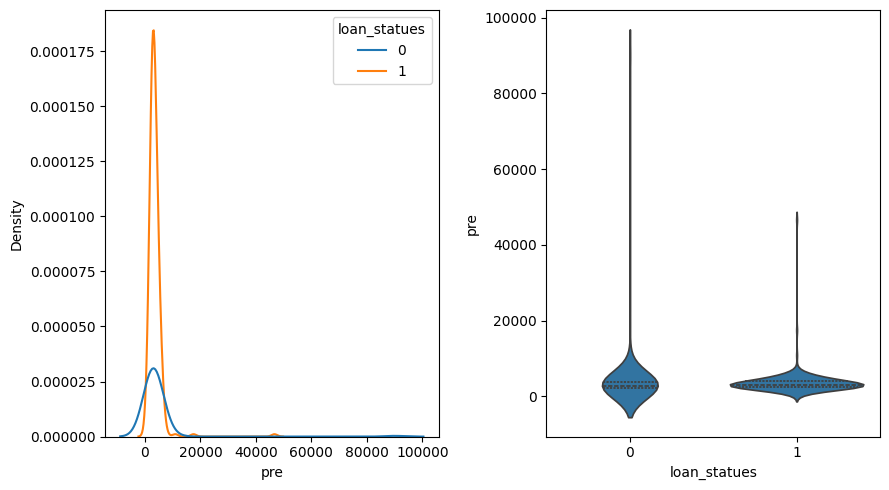

In [32]:
x1 = df[(df["Loan_Status"]==0)]
pre = (x1["LoanAmount"]/x1["ApplicantIncome"])*100

x2 = df[(df["Loan_Status"]==1)]
pre2 = (x2["LoanAmount"]/x2["ApplicantIncome"])*100

dic = {"pre" : list(pre)+list(pre2) , "loan_statues" : [0]*len(pre)+[1]*len(pre2)}
df2 = pd.DataFrame(dic)

fig,axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (9,5))
sns.kdeplot(x = df2["pre"] , hue = df2["loan_statues"], ax = axs[0])
sns.violinplot(x = df2["loan_statues"]  ,y = df2["pre"] , ax = axs[1] , inner = "quartile")
plt.tight_layout()
plt.show()

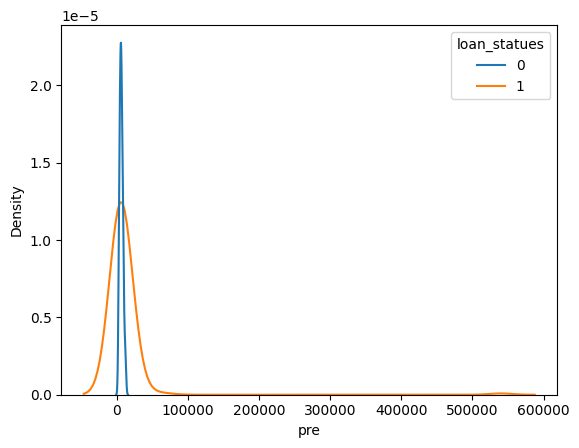

In [33]:
x1 = df[(df["Loan_Status"]==0)&(df["CoapplicantIncome"]>0)]
pre = (x1["LoanAmount"]/x1["CoapplicantIncome"])*100

x2 = df[(df["Loan_Status"]==1)]
pre2 = (x2["LoanAmount"]/x2["CoapplicantIncome"])*100

dic = {"pre" : list(pre)+list(pre2) , "loan_statues" : [0]*len(pre)+[1]*len(pre2)}
df2 = pd.DataFrame(dic)

sns.kdeplot(x = df2["pre"] , hue = df2["loan_statues"])
plt.show()

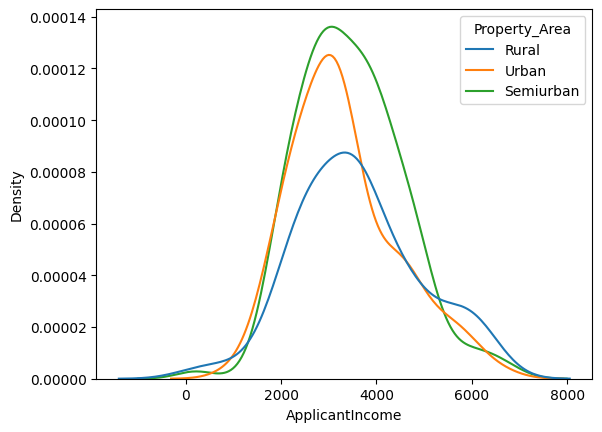

In [34]:
sns.kdeplot(x = df["ApplicantIncome"] , hue = df["Property_Area"])
plt.show()

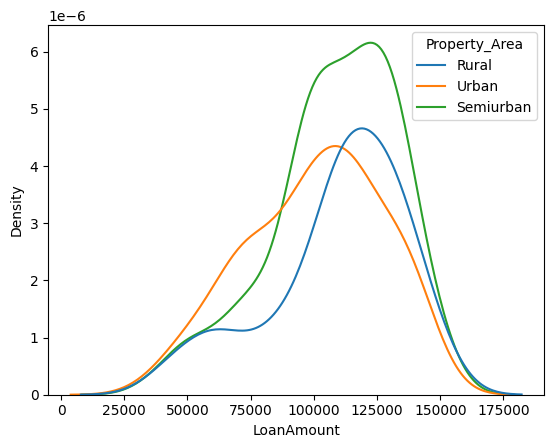

In [35]:
sns.kdeplot(x = df["LoanAmount"] , hue = df["Property_Area"])
plt.show()

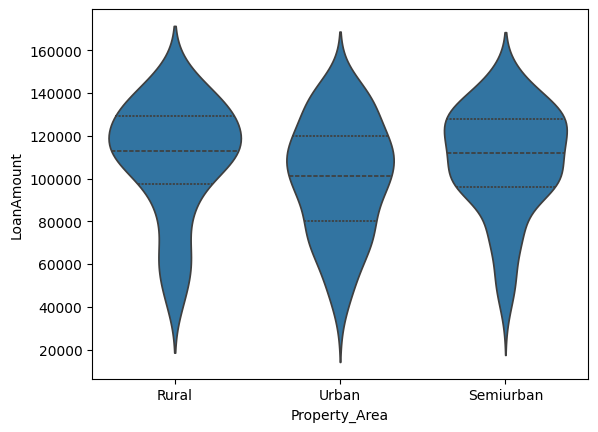

In [36]:
sns.violinplot(x = df["Property_Area"] , y = df["LoanAmount"] , inner = "quartile")
plt.show()

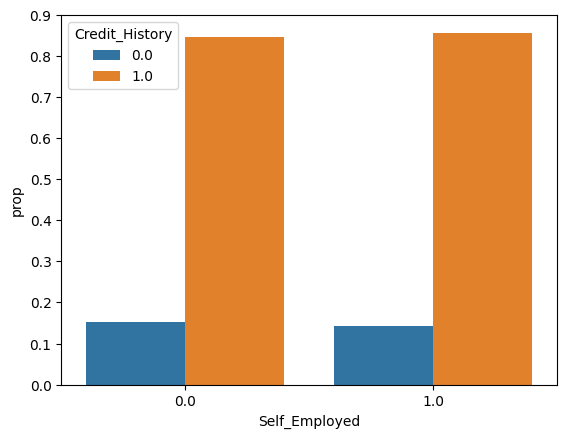

In [37]:
p = df.groupby(["Self_Employed"])["Credit_History"].value_counts(normalize = True).reset_index(name = "prop")
sns.barplot(x = p["Self_Employed"] , y = p["prop"] , hue = p["Credit_History"])
plt.show()

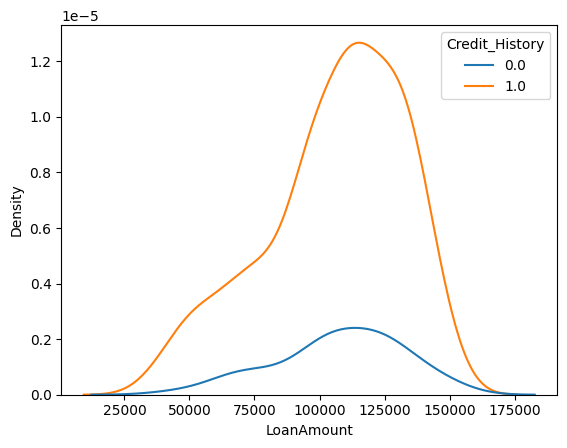

In [38]:
sns.kdeplot(x = df["LoanAmount"] , hue = df["Credit_History"])
plt.show()

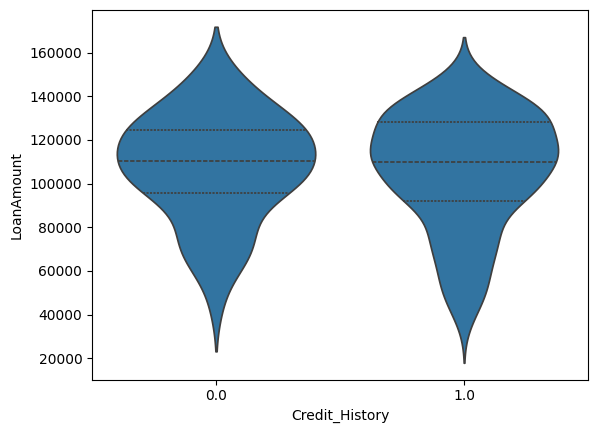

In [39]:
sns.violinplot(x = df["Credit_History"] , y = df["LoanAmount"] , inner = "quartile")
plt.show()

Saya rasa tidak ada faktor kuat lainnya antara target dan fitur selain yang sebelumnya

<Axes: >

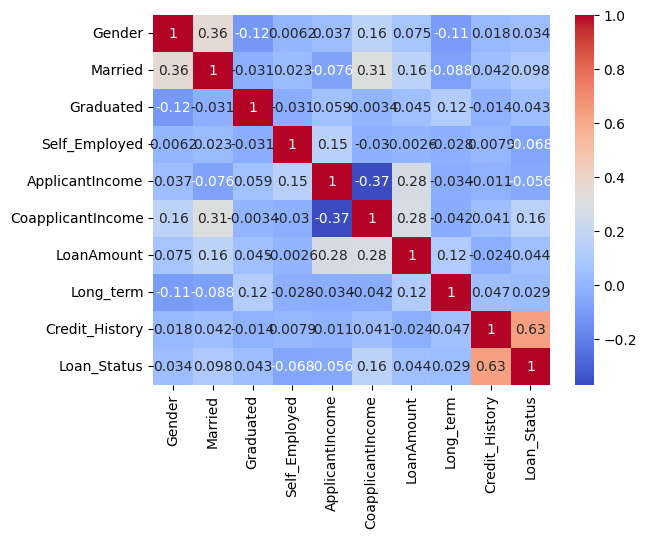

In [40]:
df_cor =df.corr(numeric_only=True)
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

#### Feature Engineering

In [41]:
df_new = df.copy()
df_new.head(5)

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


Cheak Imbalance

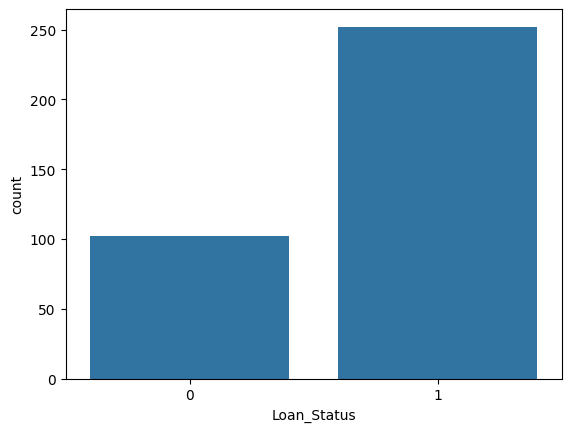

In [42]:
sns.countplot(x = df_new["Loan_Status"])
plt.show()

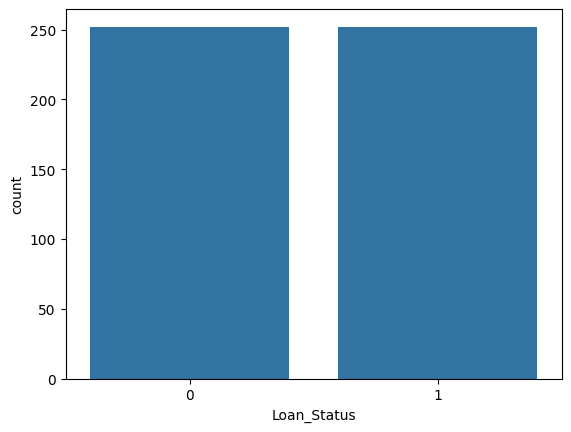

In [43]:
majority_count ,  minority_count = df_new["Loan_Status"].value_counts()
df_minority = df[df["Loan_Status"]==0]
min_samples = df_minority.sample(majority_count-minority_count , replace = True)
df_new = pd.concat([min_samples , df_new] , axis = 0)
sns.countplot(x = df_new["Loan_Status"])
plt.show()

Mengencoding nilai kategori ke angka

In [44]:
df_new = pd.get_dummies(df_new , columns = ["Dependents" , "Property_Area"])
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
86,0.0,1,1,0.0,4583,0.0,84000.0,1.0,1.0,0,True,False,False,False,True,False,False
73,1.0,1,0,0.0,2071,754.0,94000.0,1.0,1.0,1,False,False,False,True,False,True,False
116,1.0,0,1,0.0,3858,0.0,76000.0,1.0,1.0,1,True,False,False,False,False,True,False
30,1.0,1,1,0.0,3941,2336.0,134000.0,1.0,1.0,1,True,False,False,False,False,True,False
314,1.0,1,0,0.0,2600,1700.0,107000.0,1.0,1.0,1,True,False,False,False,True,False,False


In [45]:
df_new.drop(columns = ["Dependents_0" , "Property_Area_Rural"] , axis = 1 , inplace = True)
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
199,1.0,1,1,1.0,5746,0.0,144000.0,0.0,1.0,1,False,True,False,False,False
161,1.0,1,0,0.0,4931,0.0,128000.0,1.0,1.0,0,False,False,True,True,False
197,1.0,0,0,0.0,2927,2405.0,111000.0,1.0,1.0,1,False,False,False,True,False
92,1.0,1,1,0.0,4860,830.0,125000.0,1.0,1.0,1,False,False,False,True,False
4,1.0,1,0,0.0,2333,1516.0,95000.0,1.0,1.0,1,False,False,False,False,True


In [46]:
X = df_new.drop(columns = ["Loan_Status"] , axis = 1 )
Y = df_new["Loan_Status"]

In [47]:

x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = 0.25 , random_state = 42)

In [48]:
X = X.reset_index(drop = True)
Y = Y.reset_index(drop = True)

Scaling

In [49]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
# Definisikan model SVC dengan kernel linear
classifier_3 = SVC(kernel="linear")

# Latih model pada data pelatihan
classifier_3.fit(x_train, y_train)

# Prediksi label untuk data uji
y_predict = classifier_3.predict(x_test)

# Laporan klasifikasi sebelum penyetelan parameter
classification_rep = classification_report(y_test, y_predict)
print("Classification Report (Before Parameter Tuning):")
print(classification_rep)

# Parameter grid untuk pencarian parameter terbaik
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', None]
}

# Inisialisasi model SVC
svm = GridSearchCV(classifier_3, param_grid, cv=5)

# Latih model dengan pencarian grid
svm.fit(x_train, y_train)

# Mendapatkan parameter terbaik
best_params = svm.best_params_
print("\nBest Parameters:")
print(best_params)

# Mendapatkan skor terbaik
best_score = svm.best_score_
print("\nBest Score:", best_score)

# Prediksi label untuk data uji menggunakan model dengan parameter terbaik
y_predict_best = svm.predict(x_test)

# Laporan klasifikasi setelah penyetelan parameter
classification_rep_best = classification_report(y_test, y_predict_best)
print("\nClassification Report (After Parameter Tuning):")
print(classification_rep_best)


Classification Report (Before Parameter Tuning):
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        62
           1       0.71      0.92      0.80        64

    accuracy                           0.77       126
   macro avg       0.80      0.77      0.76       126
weighted avg       0.80      0.77      0.76       126


Best Parameters:
{'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 10, 'kernel': 'rbf'}

Best Score: 0.8862807017543858

Classification Report (After Parameter Tuning):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        62
           1       0.87      0.94      0.90        64

    accuracy                           0.90       126
   macro avg       0.90      0.90      0.90       126
weighted avg       0.90      0.90      0.90       126



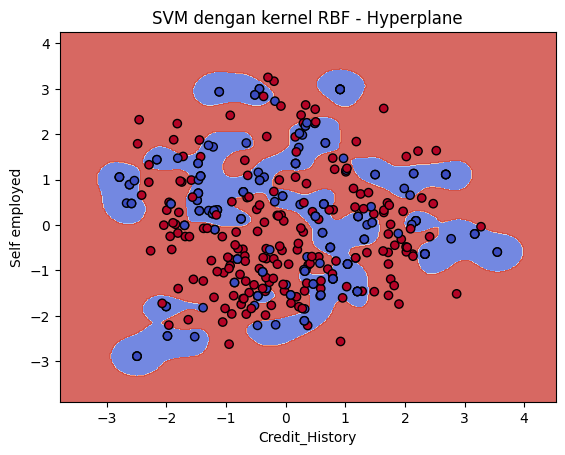

In [51]:
# Pilih dua fitur penting untuk visualisasi
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Latih model SVM dengan kernel RBF menggunakan parameter terbaik yang ditemukan
svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], class_weight=best_params['class_weight'])
svm_rbf.fit(x_train_pca, y_train)

# Buat grid untuk memvisualisasikan batas keputusan
h = .02  # Step size dalam mesh
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi label untuk setiap titik dalam grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot hasil visualisasi
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot juga data latihnya
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Credit_History')
plt.ylabel('Self employed')
plt.title('SVM dengan kernel RBF - Hyperplane')
plt.show()

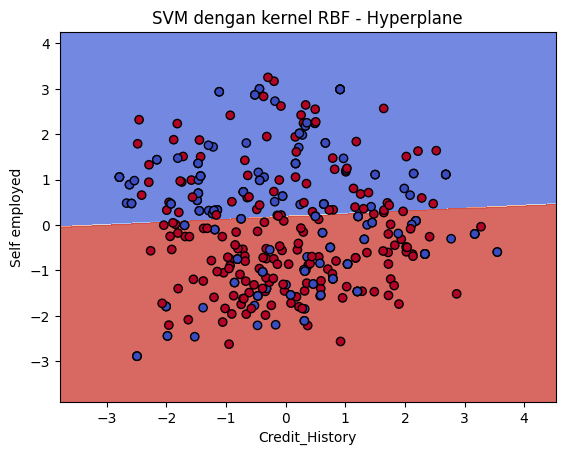

In [52]:
# Pilih dua fitur penting untuk visualisasi
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Latih model SVM dengan kernel RBF menggunakan parameter terbaik yang ditemukan
svm_rbf = SVC(kernel='linear', C=best_params['C'], gamma=best_params['gamma'], class_weight=best_params['class_weight'])
svm_rbf.fit(x_train_pca, y_train)

# Buat grid untuk memvisualisasikan batas keputusan
h = .02  # Step size dalam mesh
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi label untuk setiap titik dalam grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot hasil visualisasi
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot juga data latihnya
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Credit_History')
plt.ylabel('Self employed')
plt.title('SVM dengan kernel RBF - Hyperplane')
plt.show()

Dari kedua plot diatas saya tidak dapat menyimpulkan hasil itu terbaik dikarenakan masih ada yang diklasifikasikan belum benar.